<a href="https://colab.research.google.com/github/DS-Ankit/DataScience/blob/master/country_level_house_rent(Group_project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Libraries

In [ ]:
#import library
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import category_encoders as ce

import os
# for dirname, _, filenames in os.walk('D:\jupyter_program'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

## Importing the Dataset

In [ ]:
# import the dataset

train = pd.read_csv('train_values_OL27nta.csv')
label = pd.read_csv('train_labels_DPetPH2.csv')
test = pd.read_csv('test_values_kWyIOM9.csv')


# setting the max column top 40, so that we can see all the columns
pd.set_option('display.max_column', 40)
train.head(2)

,row_id,county_code,state,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,rucc,urban_influence,economic_typology,...,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,0,8e686a7,fb8cab1,3876.0,408.0,24.583,NaN,18.380,0.945945,0.010761,0.026038,0.005685,0.005635,0.0,0.005935,0.0,4.172,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and does not co...,Manufacturing-dependent,...,0.166,0.100,NaN,0.262,0.342,11.022908,NaN,NaN,217,NaN,NaN,0.471,0.218,0.190,0.083250,0.327984,0.389168,0.199599,10.008982,9.752342
1,1,d1b5fc5,842bd12,10224.0,1166.0,28.346,3.0,26.694,0.808959,0.002284,0.173426,0.001803,0.001493,0.0,0.012033,0.0,7.714,"Nonmetro - Completely rural or less than 2,500...",Micropolitan not adjacent to a metro area,Recreation,...,0.102,0.066,0.07,0.200,0.148,9.904099,NaN,18.26,181,2009.0,1690.0,0.472,0.290,0.077,0.099099,0.202202,0.302302,0.396396,14.482893,3.013219


In [ ]:
# checking the shape of the training dataset

train.shape

(1562, 45)

In [ ]:
#checking columns rucc
train["rucc"].unique()

array(['Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area',
       'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area',
       'Metro - Counties in metro areas of fewer than 250,000 population',
       'Metro - Counties in metro areas of 1 million population or more',
       'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area',
       'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area',
       'Metro - Counties in metro areas of 250,000 to 1 million population',
       'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area',
       'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area'],
      dtype=object)

In [ ]:
#checking types of train columns
train.dtypes

row_id                                          int64
county_code                                    object
state                                          object
population                                    float64
renter_occupied_households                    float64
pct_renter_occupied                           float64
evictions                                     float64
rent_burden                                   float64
pct_white                                     float64
pct_af_am                                     float64
pct_hispanic                                  float64
pct_am_ind                                    float64
pct_asian                                     float64
pct_nh_pi                                     float64
pct_multiple                                  float64
pct_other                                     float64
poverty_rate                                  float64
rucc                                           object
urban_influence             

In [ ]:
# checking the shape of the test dataset

test.shape

(1576, 45)

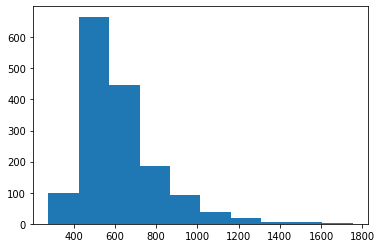

In [ ]:
#histogram plot of our target
plt.hist(label['gross_rent'], bins = 10, histtype="barstacked", rwidth = 20, align = 'left')
plt.show()

In [ ]:
#checking correlation of train set
train.corr()

,row_id,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
row_id,1.000000,-0.027088,-0.025233,0.005550,-0.028892,0.030786,0.001794,-0.026790,0.011758,0.032628,-0.040700,0.029529,0.026121,-0.025367,-0.006437,-0.022062,0.024223,-0.004493,0.005952,0.006625,0.019342,0.000131,0.000853,-0.033293,-0.025073,0.018438,-0.040325,-0.026144,0.021475,0.019879,-0.019878,0.017089,-0.014523,0.004258,0.010551,0.004687,-0.014893,-0.002908,-0.003904,0.023515
population,-0.027088,1.000000,0.979015,0.285874,0.800173,0.162747,-0.233149,0.065498,0.194042,-0.047605,0.459903,0.086141,0.074529,0.219683,-0.029601,0.074573,0.004028,0.000057,-0.059270,-0.217103,-0.195657,-0.172038,-0.029178,-0.000721,-0.240345,-0.102763,-0.026795,-0.269513,-0.133897,-0.166771,-0.134868,0.102691,0.067631,-0.202828,-0.029638,-0.303886,-0.068912,0.295888,0.099957,-0.252709
renter_occupied_households,-0.025233,0.979015,1.000000,0.320175,0.790723,0.146213,-0.227568,0.076058,0.176860,-0.040348,0.435849,0.076874,0.069009,0.218633,-0.002518,0.065894,0.009995,0.014840,-0.047528,-0.197820,-0.172043,-0.150268,-0.013490,-0.004593,-0.206235,-0.101503,0.018712,-0.237650,-0.112827,-0.149875,-0.121639,0.092542,0.040795,-0.182385,-0.011385,-0.271734,-0.075980,0.261647,0.099201,-0.221893
pct_renter_occupied,0.005550,0.285874,0.320175,1.000000,0.357836,0.229203,-0.472168,0.283012,0.211543,0.140909,0.407788,0.172797,0.195395,0.231417,0.311045,-0.009933,0.123263,0.182252,0.011460,-0.052990,-0.076117,-0.134396,0.159542,-0.056945,-0.154324,-0.052468,0.230084,-0.239387,0.030945,-0.246900,-0.243364,0.026768,0.110950,-0.457286,0.103800,-0.372389,-0.076354,0.255215,0.319060,-0.320552
evictions,-0.028892,0.800173,0.790723,0.357836,1.000000,0.147673,-0.286329,0.187811,0.146569,-0.036577,0.390145,0.025700,0.080335,0.204129,0.026839,0.082754,0.010476,0.046369,-0.041610,-0.121492,-0.148882,-0.121295,0.056684,-0.016261,-0.180947,-0.051053,0.154634,-0.264938,-0.089318,-0.168579,-0.135237,0.129837,0.093737,-0.253480,-0.033288,-0.296329,-0.051397,0.290274,0.163688,-0.253198
rent_burden,0.030786,0.162747,0.146213,0.229203,0.147673,1.000000,-0.192858,0.336120,-0.015368,-0.144384,0.127979,-0.006853,0.018550,0.154167,0.387541,-0.367540,0.429351,0.059280,-0.211067,-0.008044,0.079550,0.144635,0.296222,-0.226291,-0.129765,0.122957,0.220348,-0.163302,0.124221,-0.021947,-0.011258,0.175525,-0.180764,-0.116121,0.146306,-0.166862,-0.170873,0.118751,-0.116683,-0.056973
pct_white,0.001794,-0.233149,-0.227568,-0.472168,-0.286329,-0.192858,1.000000,-0.583318,-0.616874,-0.298028,-0.283322,-0.134611,-0.107596,-0.173874,-0.507542,0.273989,-0.318836,-0.541874,-0.296796,-0.124158,0.029628,-0.127659,-0.450258,0.143628,0.017409,0.206009,-0.566118,-0.078675,-0.129243,-0.042792,-0.012197,0.087588,-0.339290,0.414822,-0.496270,0.297398,0.194806,0.023405,-0.385159,0.276071
pct_af_am,-0.026790,0.065498,0.076058,0.283012,0.187811,0.336120,-0.583318,1.000000,-0.112171,-0.106352,0.024738,-0.063326,-0.109740,0.115787,0.499824,-0.355941,0.400824,0.202526,-0.080939,0.412122,0.030566,0.499317,0.702009,-0.284449,0.256720,0.184202,0.723656,0.106245,0.390890,0.139159,0.115274,0.104425,0.027910,-0.206035,0.354774,-0.017912,-0.263132,-0.096975,0.062403,0.019817
pct_hispanic,0.011758,0.194042,0.176860,0.211543,0.146569,-0.0

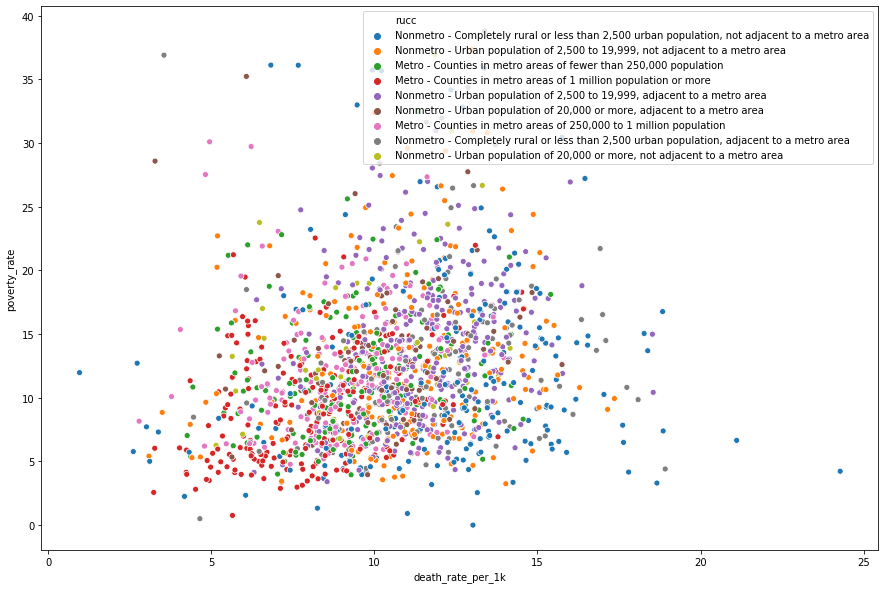

In [ ]:
#poverty_rate - Percent of the population with income in the past 12 months below the poverty level
#rucc-classification scheme that distinguishes metropolitan counties by the population size of their metro area, and nonmetropolitan counties by degree of urbanization and adjacency to a metro area. The official Office of Management and Budget (OMB) metro and nonmetro categories have been subdivided into three metro and six nonmetro categories
#death_rate_per_1k - Deaths per 1,000 of population
plt.rcParams['figure.figsize'] = (15, 10)
sns.scatterplot(train['death_rate_per_1k'], train['poverty_rate'], hue = train['rucc'])
plt.show()

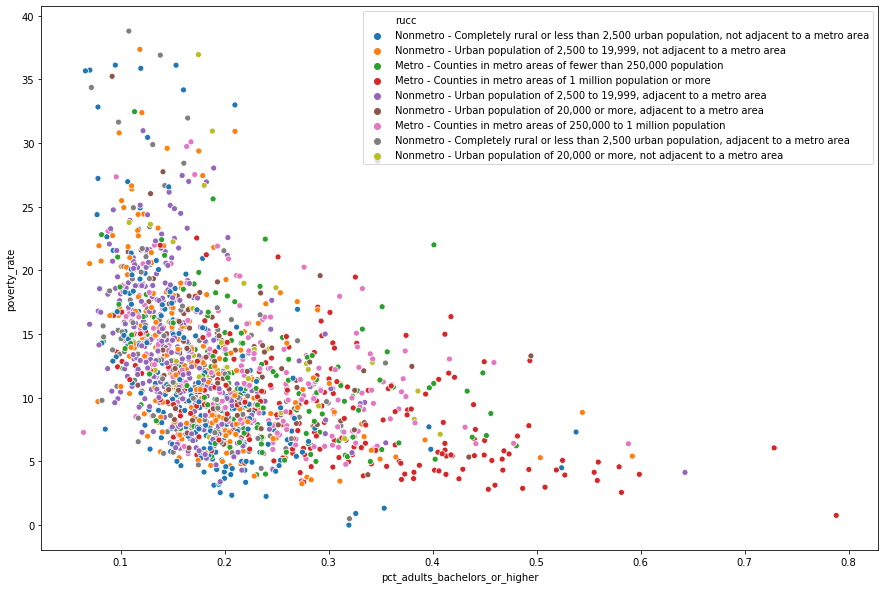

In [ ]:
#pct_adults_bachelors_or_higher - Percent of adult population which has a bachelor's degree or higher as highest level of education achieved
plt.rcParams['figure.figsize'] = (15, 10)
sns.scatterplot(train['pct_adults_bachelors_or_higher'], train['poverty_rate'], hue = train['rucc'])
plt.show()

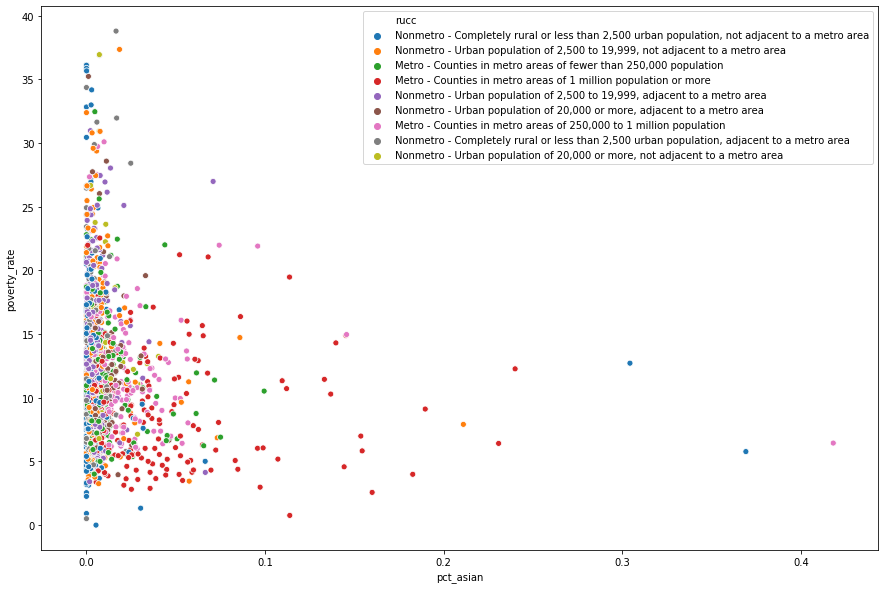

In [ ]:
#pct_asian - Percent of population that is Asian alone and not Hispanic or Latino
plt.rcParams['figure.figsize'] = (15, 10)
sns.scatterplot(train['pct_asian'], train['poverty_rate'], hue = train['rucc'])
plt.show()

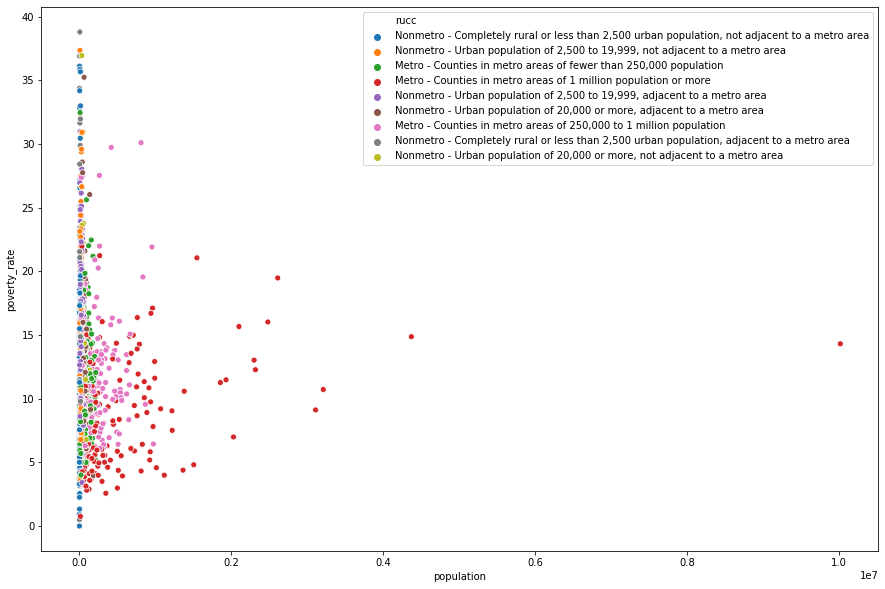

In [ ]:
#population - Total population
plt.rcParams['figure.figsize'] = (15, 10)
sns.scatterplot(train['population'], train['poverty_rate'], hue = train['rucc'])
plt.show()

## Exploring the Target Variable

In [ ]:
# target variable

#from scipy import stats
#from scipy.stats import norm

#plt.rcParams['figure.figsize'] = (15, 10)

#sns.distplot(label['gross_rent'] , fit = norm)

# Get the fitted parameters used by the function
#(mu, sigma) = norm.fit(label['gross_rent'])
#print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

#Now plot the distribution
#plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#            loc='best')
#plt.ylabel('Frequency')
#plt.title('SalePrice distribution')

#Get also the QQ-plot
#fig = plt.figure()
#res = stats.probplot(label['gross_rent'], plot = plt)
#plt.show()

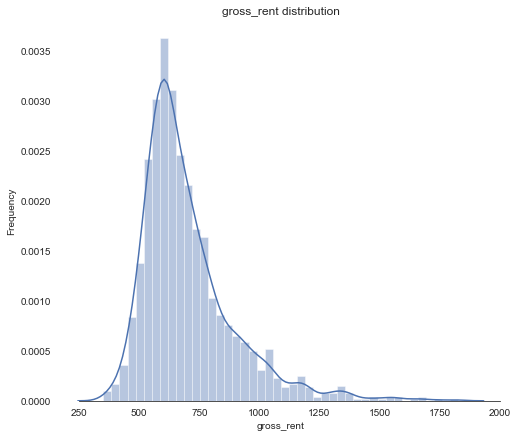

In [ ]:
from scipy import stats
from scipy.stats import norm
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(label['gross_rent'])
#print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

#Check the new distribution 
sns.distplot(label['gross_rent'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="gross_rent")
ax.set(title="gross_rent distribution")
sns.despine(trim=True, left=True)
plt.show()


 mu = 6.52 and sigma = 0.24



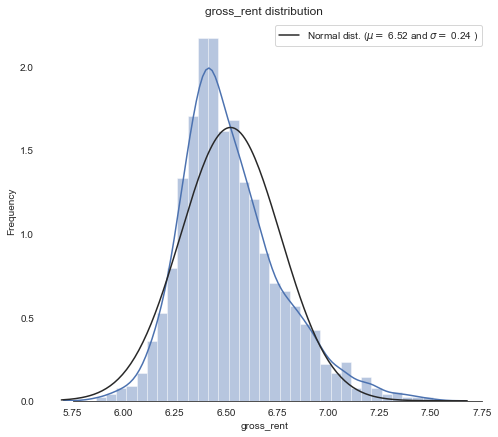

In [ ]:
label["gross_rent"] = np.log1p(label["gross_rent"])
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(label['gross_rent'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(label['gross_rent'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="gross_rent")
ax.set(title="gross_rent distribution")
sns.despine(trim=True, left=True)
plt.show()

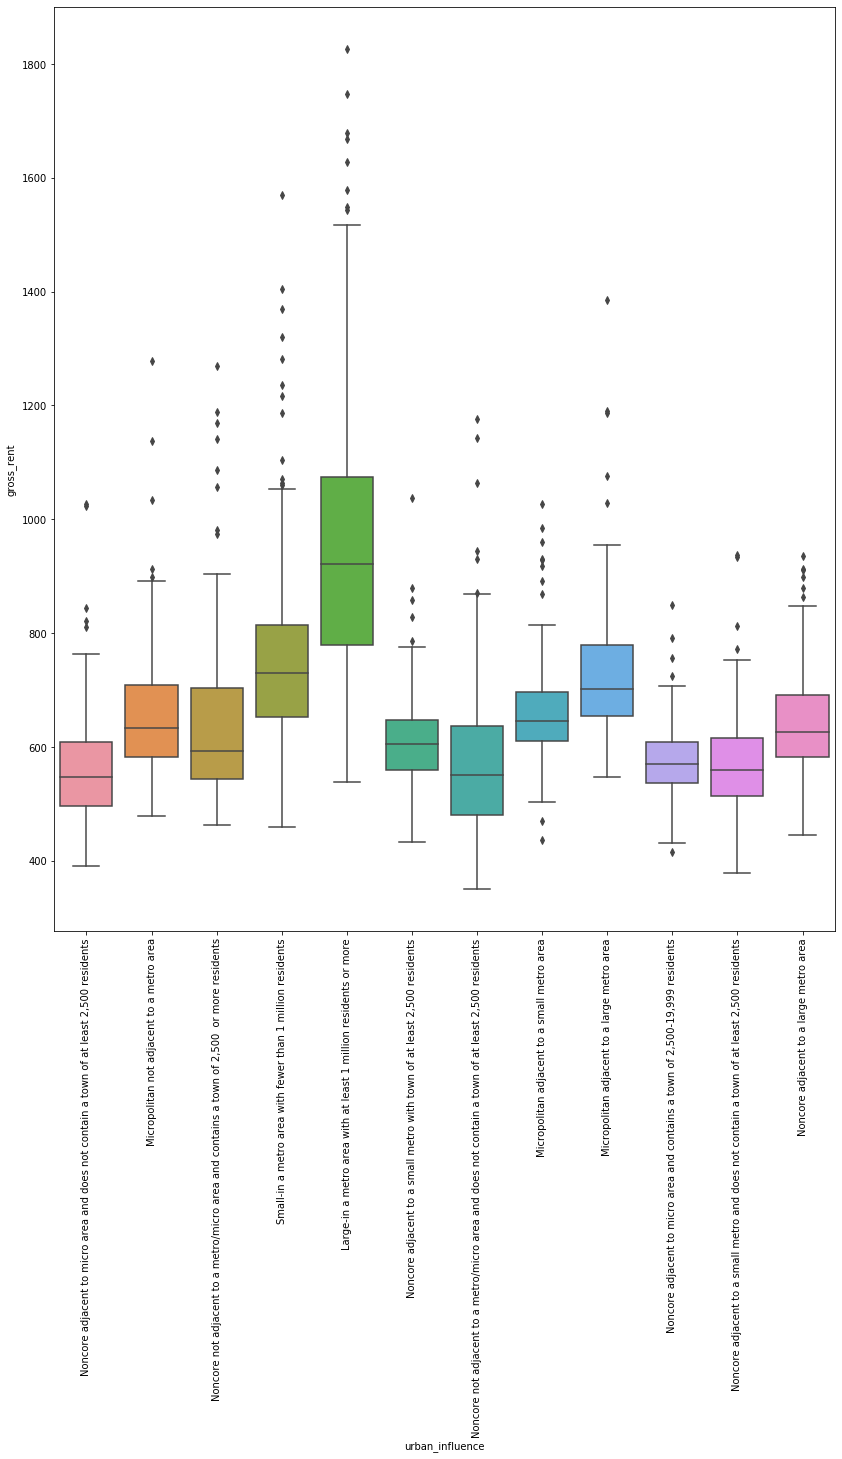

In [ ]:
#urban_influence - Urban Influence Codes "form a classification scheme that distinguishes metropolitan counties by population size of their metro area, and nonmetropolitan counties by size of the largest city or town and proximity to metro and micropolitan areas.
plt.rcParams['figure.figsize'] = (14, 17)
sns.boxplot(train['urban_influence'], label['gross_rent'])
plt.xticks(rotation = 90)
plt.show()

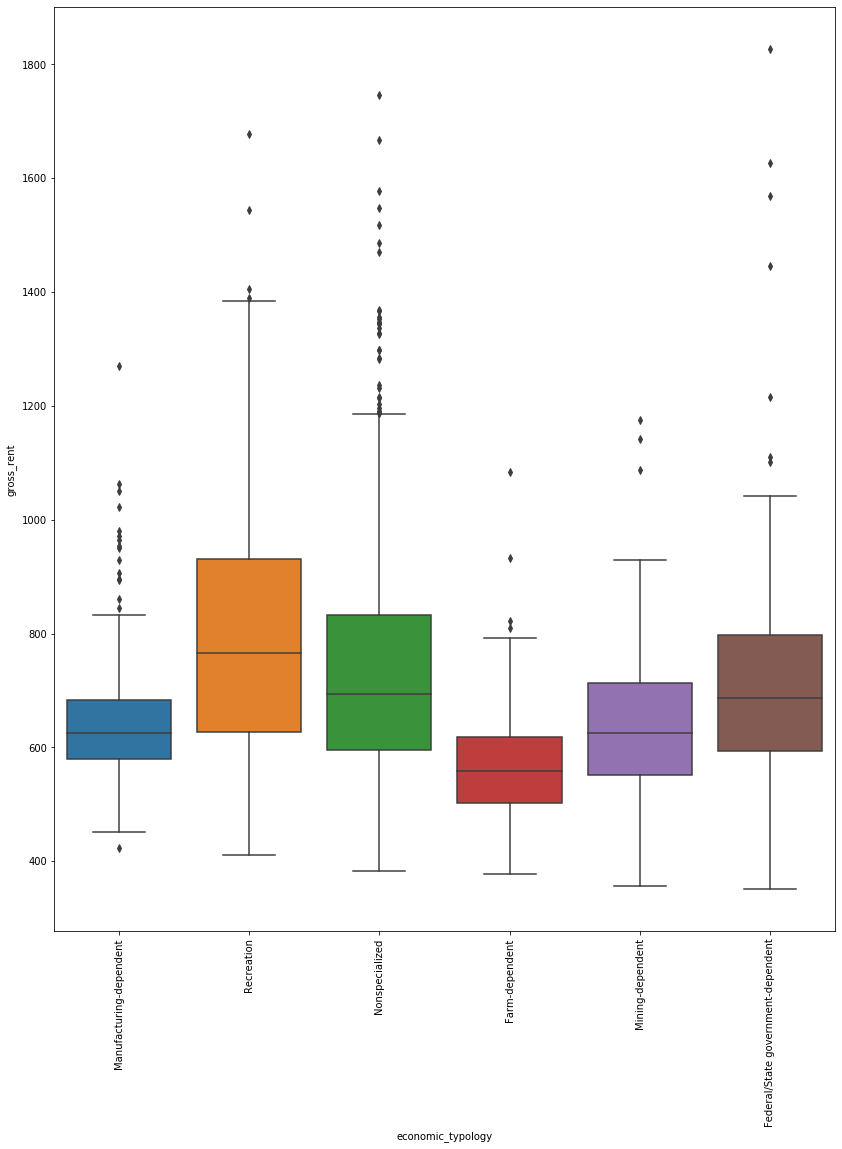

In [ ]:
#economic_typology-counties according to six mutually exclusive categories of economic dependence and six overlapping categories of policy-relevant themes. The economic dependence types include farming, mining, manufacturing, Federal/State government, recreation, and nonspecialized counties
plt.rcParams['figure.figsize'] = (14, 17)
sns.boxplot(train['economic_typology'], label['gross_rent'])
plt.xticks(rotation = 90)
plt.show()

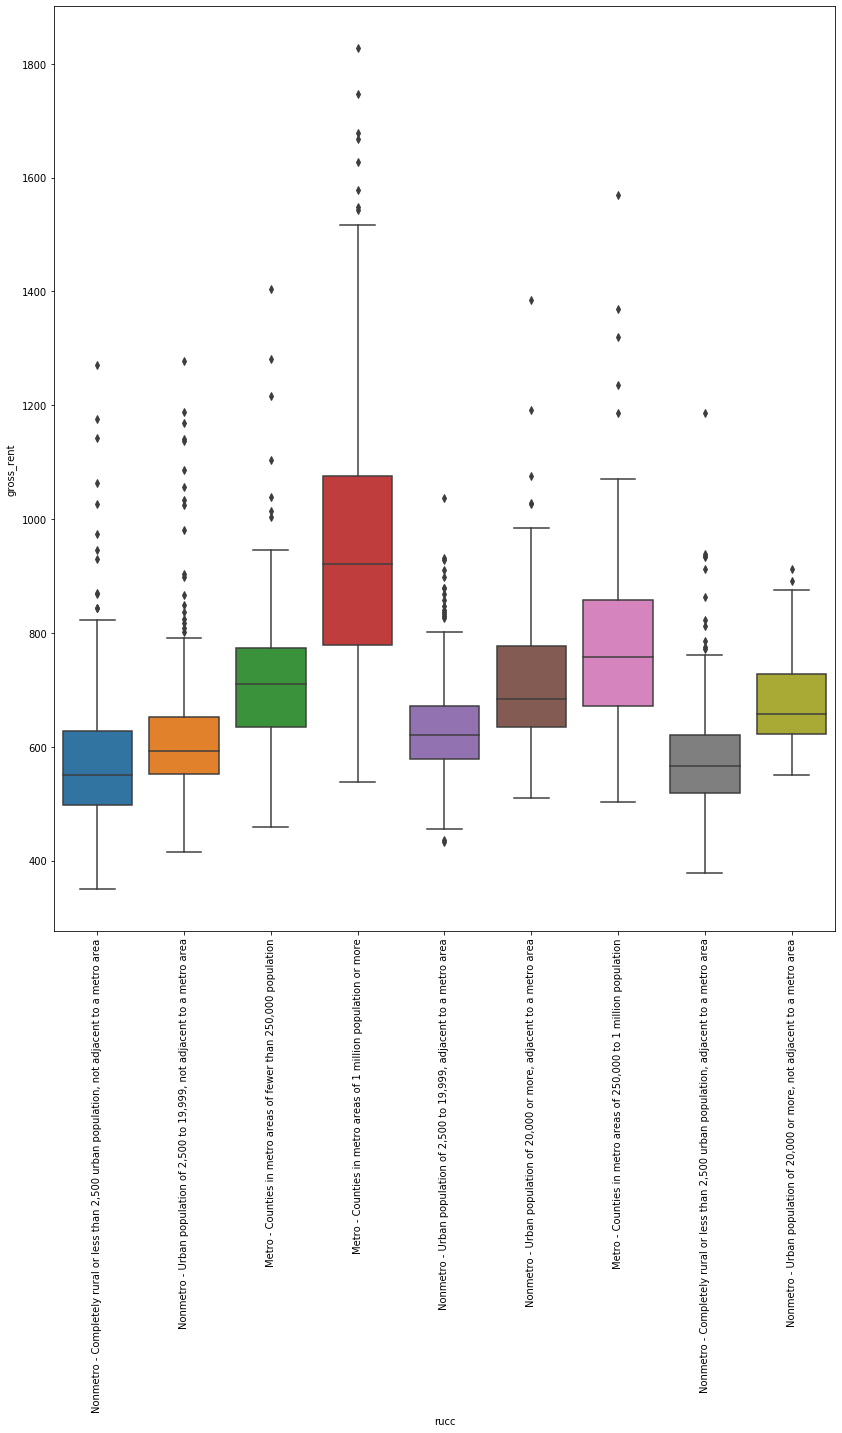

In [ ]:

plt.rcParams['figure.figsize'] = (14, 17)
sns.boxplot(train['rucc'], label['gross_rent'])
plt.xticks(rotation = 90)
plt.show()

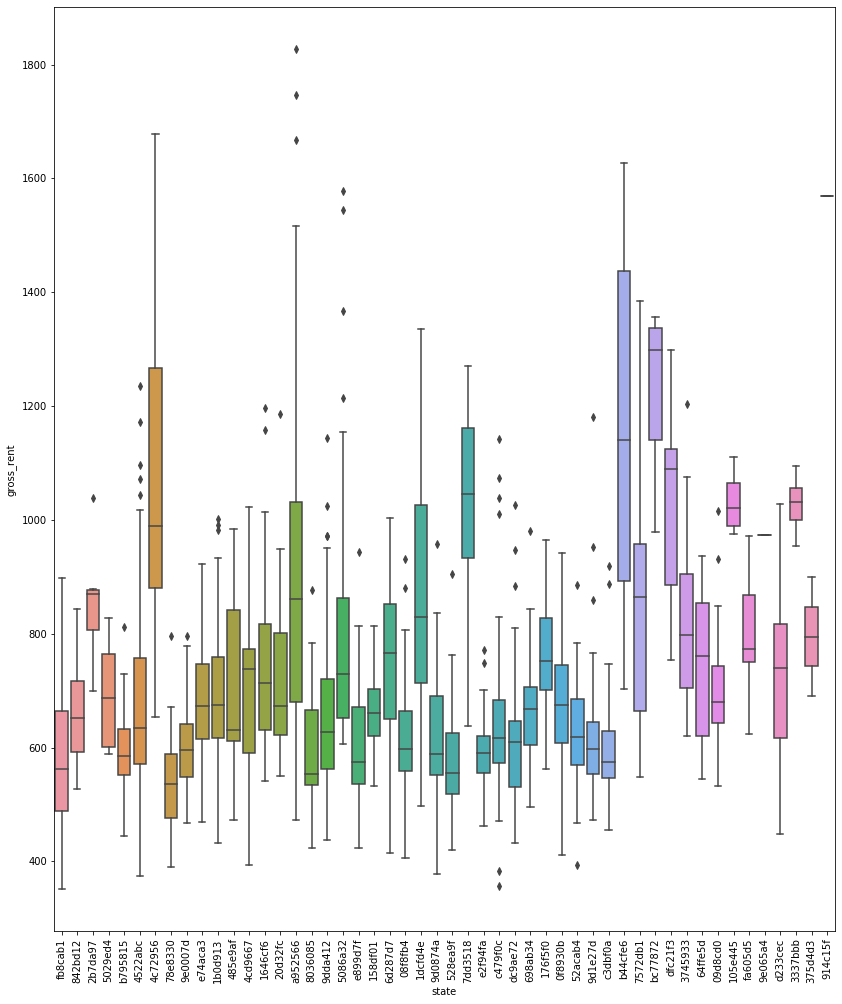

In [ ]:

plt.rcParams['figure.figsize'] = (14, 17)
sns.boxplot(train['state'], label['gross_rent'])
plt.xticks(rotation = 90)
plt.show()

# Outlier Treatment

In [ ]:
#train_data.columns

In [ ]:
# merging the values and labels

# so that we can remove the outliers from the dataset and also the training will be better

train_data = pd.merge(train, label, how="left")

In [ ]:
train_data.shape

(1562, 46)

In [ ]:
train_data.describe()

,row_id,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,...,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
count,1562.000000,1.562000e+03,1.562000e+03,1562.000000,1235.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1560.000000,1560.000000,1560.000000,...,1560.000000,1446.000000,1100.000000,1560.000000,1542.000000,613.000000,1372.000000,1562.000000,1447.000000,1448.000000,1560.000000,1560.000000,1560.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000
mean,780.500000,1.083407e+05,1.490462e+04,28.525570,397.410526,28.537526,0.769045,0.088593,0.092012,0.018431,0.012709,0.000711,0.017583,0.000916,12.182780,0.470535,0.062551,0.220037,0.088844,0.304546,...,0.106566,0.083326,0.164818,0.276981,11.637336,5.752414,21.715153,275.482714,3421.828611,2508.303867,0.499388,0.228672,0.167707,0.145666,0.346271,0.303030,0.205033,11.621356,10.415138,701.142125
std,451.054875,3.745229e+05,6.255947e+04,8.121601,1522.801074,4.670467,0.203306,0.143505,0.141599,0.074762,0.026693,0.003059,0.015836,0.001657,5.783889,0.070936,0.022615,0.067500,0.041480,0.043550,...,0.022521,0.021239,0.051483,0.053098,1.534144,4.297808,10.721369,57.827540,2538.670834,1960.312344,0.023933,0.034732,0.044555,0.067483,0.071152,0.052236,0.092001,2.756009,2.772070,192.883110
min,0.000000,2.690000e+02,6.400000e+01,7.279000,-1.000000,9.909000,0.009547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.186000,0.012000,0.053000,0.018000,0.133000,...,0.033000,0.030000,0.032000,0.104000,7.209413,-0.080000,3.140000,76.000000,340.000000,279.000000,0.314000,0.082000,0.036000,0.019000,0.074297,0.114458,0.064128,3.654080,0.961076,351.000000
25%,390.250000,1.045275e+04,1.078250e+03,22.874000,3.000000,25.869000,0.649967,0.005523,0.018747,0.001201,0.002391,0.000000,0.009465,0.000000,7.991000,0.425000,0.046000,0.171750,0.059000,0.283000,...,0.092000,0.070000,0.129000,0.243000,10.432910,2.710000,14.047500,233.000000,1859.000000,1389.750000,0.495000,0.208000,0.140000,0.094226,0.300601,0.269461,0.142142,10.014818,8.613691,578.000000
50%,780.500000,2.528200e+04,2.754000e+03,27.199500,27.000000,28.768000,0.846542,0.020599,0.037613,0.002610,0.005279,0.000000,0.014438,0.000302,11.173500,0.470500,0.061000,0.216000,0.079000,0.306000,...,0.105000,0.080000,0.163000,0.281000,11.907300,4.540000,20.285000,270.000000,2730.000000,1969.500000,0.504000,0.227000,0.164000,0.129388,0.352176,0.303303,0.182365,11.435441,10.396898,650.000000
75%,1170.750000,6.836150e+04,7.987000e+03,32.341500,162.500000,31.307250,0.933479,0.102047,0.092998,0.006121,0.011886,0.000403,0.020999,0.001197,15.018500,0.515000,0.076000,0.265000,0.109000,0.331250,...,0.122000,0.091000,0.196000,0.312000,12.885680,7.600000,27.072500,311.000000,4064.500000,2840.000000,0.511000,0.246000,0.191000,0.187719,0.396556,0.337672,0.241234,12.940235,12.250655,773.750000
max,1561.000000,1.002029e+07,1.760277e+06,73.008000,29251.000000,49.665000,0.995141,0.756011,0.987039,0.815817,0.418088,0.085037,0.184332,0.019582,38.792000,0.996000,0.242000,0.520000,0.327000,0.474000,...,0.180000,0.182000,0.419000,0.446000,14.992477,26.920000,110.450000,511.000000,25169.000000,16740.000000,0.564000,0.415000,0.488000,0.535750,0.53553

In [ ]:
#checking min values 
train_data.min()

row_id                                                                                        0
county_code                                                                             0005c75
state                                                                                   08f8fb4
population                                                                                  269
renter_occupied_households                                                                   64
pct_renter_occupied                                                                       7.279
evictions                                                                                    -1
rent_burden                                                                               9.909
pct_white                                                                            0.00954683
pct_af_am                                                                                     0
pct_hispanic                            

In [ ]:
train_data["county_code"].nunique()

1562

In [ ]:
# deleting the few columns which are not going to be used.

train_data = train_data.drop(['row_id', 'state','county_code'], axis = 1)
row_id = test['row_id']
test = test.drop(['row_id','state','county_code'], axis = 1)

## Checking Outliers in Population


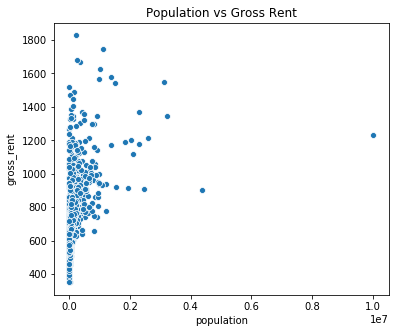

In [ ]:
plt.rcParams['figure.figsize'] = (6,5)
sns.scatterplot(train['population'], label['gross_rent'])
plt.title('Population vs Gross Rent')
plt.show()

### We can clearly see there is an outlier, which is to be removed.

In [ ]:
#Deleting outliers

train_data = train_data.drop(train_data[(train_data['population']>10000000)].index)

In [ ]:
train_data.shape

(1561, 43)

## Checking Outliers in Housing

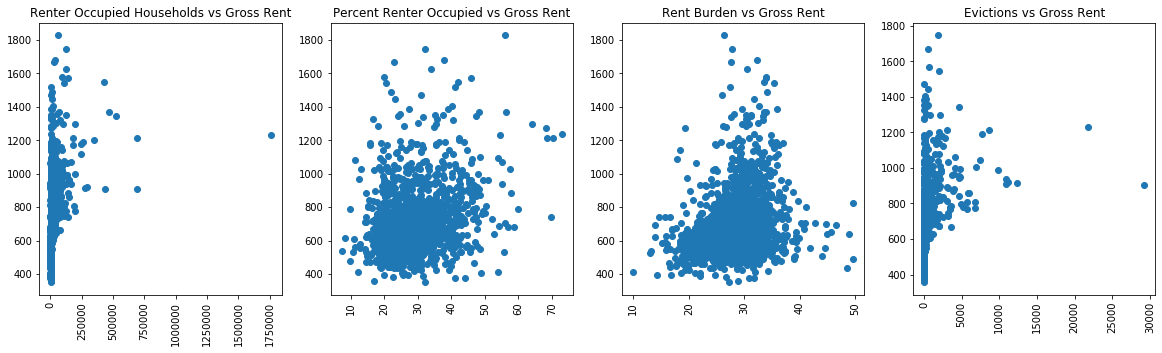

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)

plt.subplot(141)
plt.scatter(train['renter_occupied_households'], label['gross_rent'])
plt.title('Renter Occupied Households vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(142)
plt.scatter(train['pct_renter_occupied'], label['gross_rent'])
plt.title('Percent Renter Occupied vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(143)
plt.scatter(train['rent_burden'], label['gross_rent'])
plt.title('Rent Burden vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(144)
plt.scatter(train['evictions'], label['gross_rent'])
plt.title('Evictions vs Gross Rent')
plt.xticks(rotation = 90)

plt.show()

### We can see that There are Outliers in Renter Occupied Households, and Evictions, which needs to be removed.

In [ ]:
# let's remove the outliers from the renter occupied households

train_data = train_data.drop(train_data[(train_data['renter_occupied_households']> 1000000)].index)

In [ ]:
#evictions - Number of eviction judgments in which renters were ordered to leave in a given area and year
# let's remove the outliers from the evictions column

train_data = train_data.drop(train_data[(train_data['evictions']> 15000)].index)

## Checking Outliers in Ethnicity

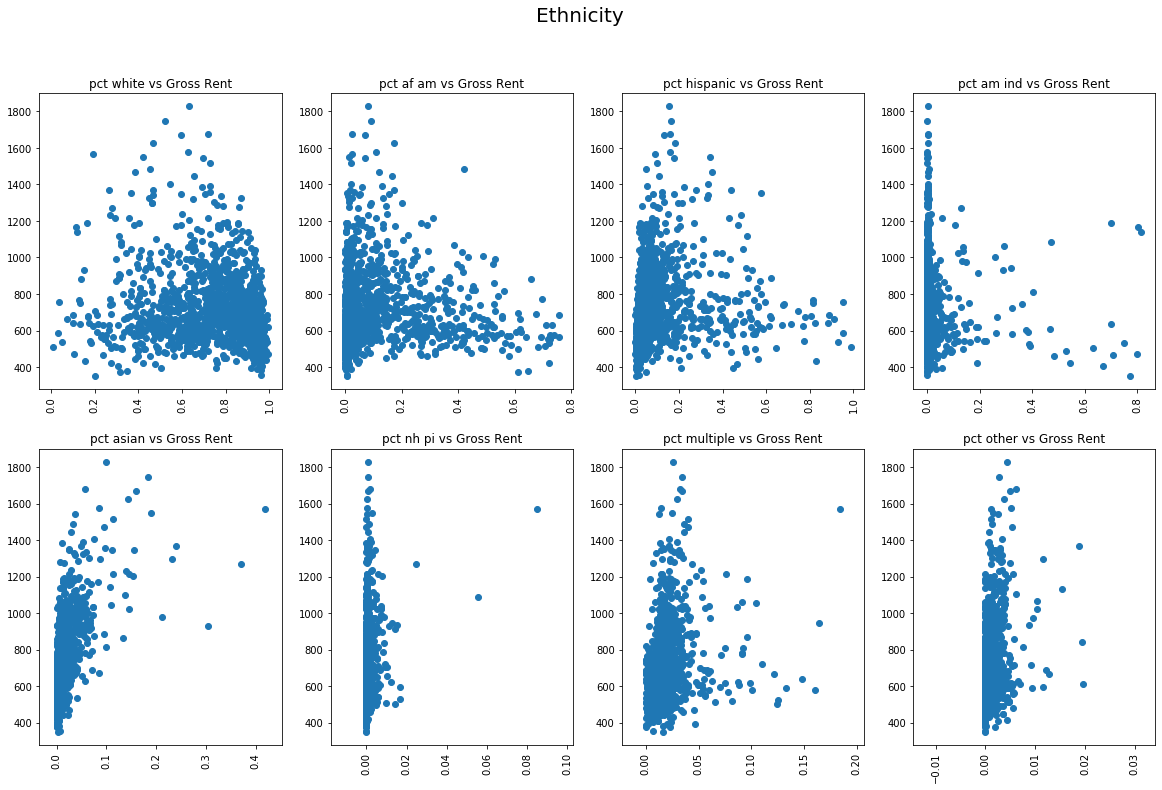

In [ ]:

plt.rcParams['figure.figsize'] = (20, 12)

plt.subplot(241)
plt.scatter(train['pct_white'], label['gross_rent'])
plt.title('pct white vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(242)
plt.scatter(train['pct_af_am'], label['gross_rent'])
plt.title('pct af am vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(243)
plt.scatter(train['pct_hispanic'], label['gross_rent'])
plt.title('pct hispanic vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(244)
plt.scatter(train['pct_am_ind'], label['gross_rent'])
plt.title('pct am ind vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(245)
plt.scatter(train['pct_asian'], label['gross_rent'])
plt.title('pct asian vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(246)
plt.scatter(train['pct_nh_pi'], label['gross_rent'])
plt.title('pct nh pi vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(247)
plt.scatter(train['pct_multiple'], label['gross_rent'])
plt.title('pct multiple vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(248)
plt.scatter(train['pct_other'], label['gross_rent'])
plt.title('pct other vs Gross Rent')
plt.xticks(rotation = 90)

plt.suptitle('Ethnicity', fontsize = 20)
plt.show()

### We can clearly see that there are outliers in pct nh pi, pct multiple and pct asian which needs to be removed.

In [ ]:
# let's remove the outloers from pct_nh_pi
#pct_nh_pi - Percent of population that is Native Hawaiian and Other Pacific Islander alone and not Hispanic or Latino

train_data = train_data.drop(train_data[(train_data['pct_nh_pi']> 0.03)].index)

In [ ]:
# let's remove the outliers from pct multiple
#pct_multiple - Percent of population that is two or more races and not Hispanic or Latino

train_data = train_data.drop(train_data[(train_data['pct_multiple']> 0.16)].index)

In [ ]:
# let's remove the outliers from pct asian
#pct_asian - Percent of population that is Asian alone and not Hispanic or Latino
train_data = train_data.drop(train_data[(train_data['pct_asian']> 0.27)].index)

## Checking Outliers in Economic

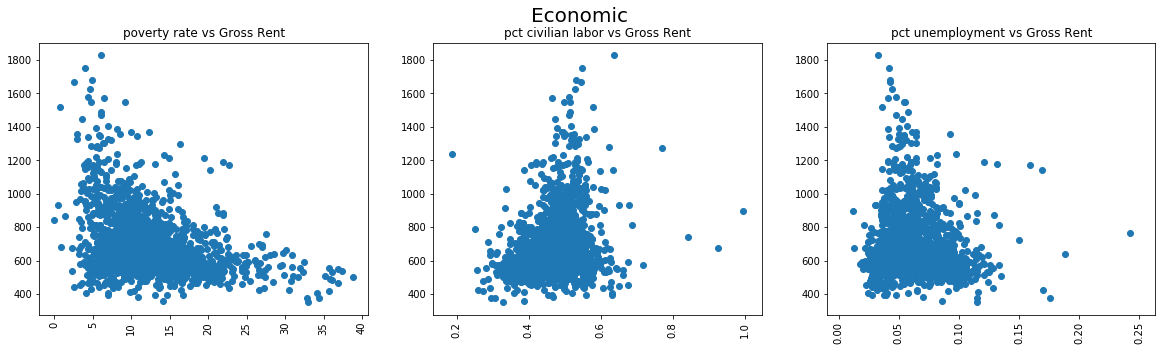

In [ ]:

plt.rcParams['figure.figsize'] = (20, 5)

plt.subplot(131)
plt.scatter(train['poverty_rate'], label['gross_rent'])
plt.title('poverty rate vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(132)
plt.scatter(train['pct_civilian_labor'], label['gross_rent'])
plt.title('pct civilian labor vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(133)
plt.scatter(train['pct_unemployment'], label['gross_rent'])
plt.title('pct unemployment vs Gross Rent')
plt.xticks(rotation = 90)

plt.suptitle('Economic', fontsize = 20)
plt.show()

### We can clearly see that pct civilain labor and pct unemployment both have some outliers, which needs to be removed.

In [ ]:
# let's remove the outliers from pct civilian labor
#pct_civilian_labor - Civilian labor force, annual average, as percent of population.

train_data = train_data.drop(train_data[(train_data['pct_civilian_labor']> 0.8)].index)

In [ ]:
# let's remove the outliers from pct_unemployment
#pct_unemployment - Unemployment, annual average, as percent of population
train_data = train_data.drop(train_data[(train_data['pct_unemployment']> 0.20)].index)

## Checking Outliers in Health

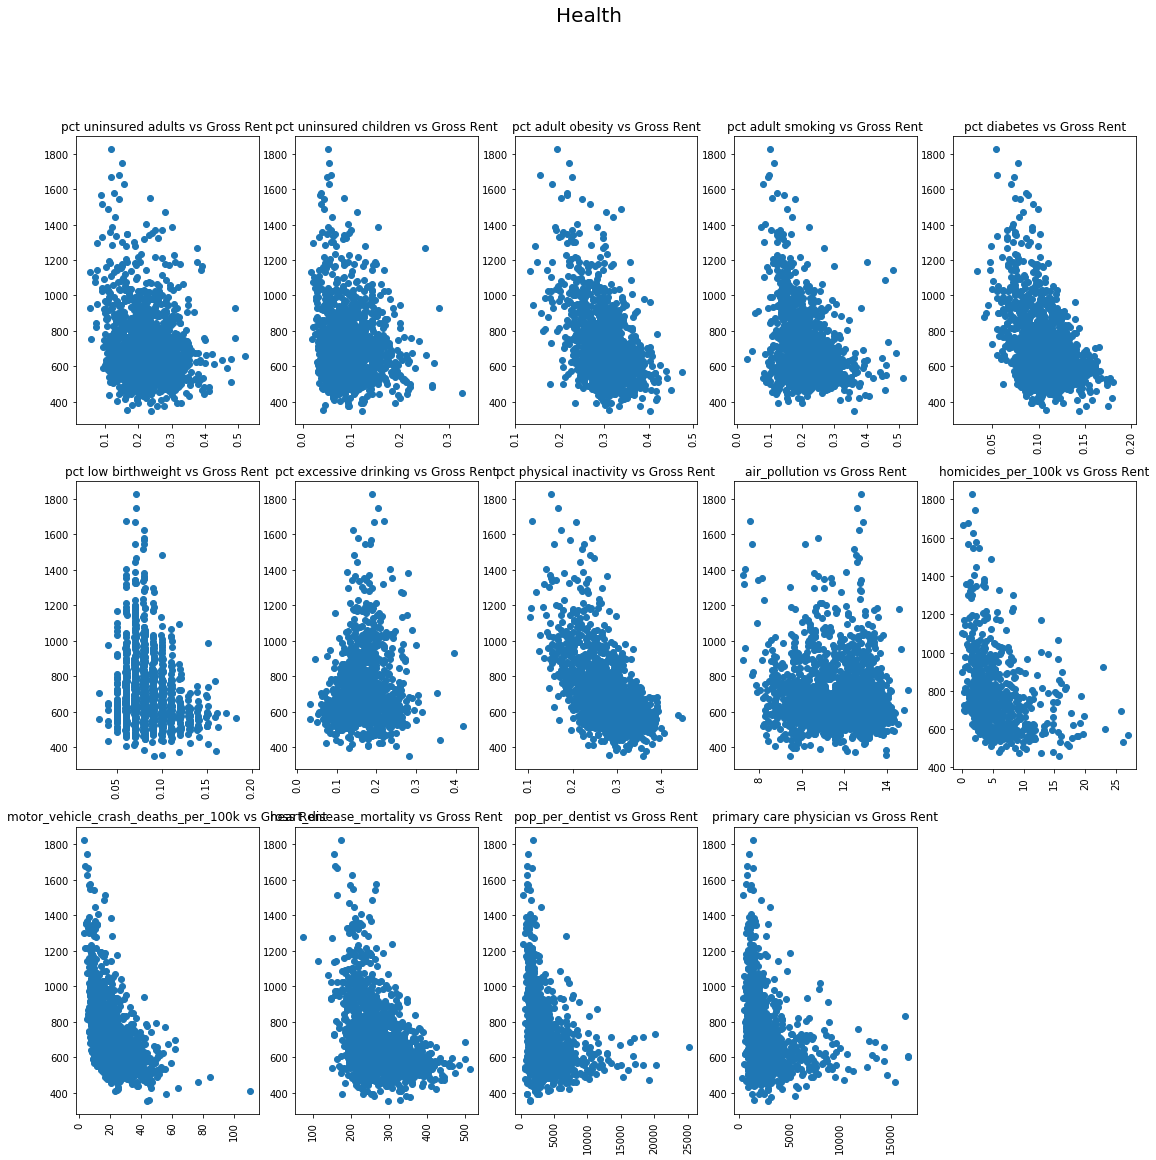

In [ ]:

plt.rcParams['figure.figsize'] = (19, 18)

plt.subplot(351)
plt.scatter(train['pct_uninsured_adults'], label['gross_rent'])
plt.title('pct uninsured adults vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(352)
plt.scatter(train['pct_uninsured_children'], label['gross_rent'])
plt.title('pct uninsured children vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(353)
plt.scatter(train['pct_adult_obesity'], label['gross_rent'])
plt.title('pct adult obesity vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(354)
plt.scatter(train['pct_adult_smoking'], label['gross_rent'])
plt.title('pct adult smoking vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(355)
plt.scatter(train['pct_diabetes'], label['gross_rent'])
plt.title('pct diabetes vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(356)
plt.scatter(train['pct_low_birthweight'], label['gross_rent'])
plt.title('pct low birthweight vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(357)
plt.scatter(train['pct_excessive_drinking'], label['gross_rent'])
plt.title('pct excessive drinking vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(358)
plt.scatter(train['pct_physical_inactivity'], label['gross_rent'])
plt.title('pct physical inactivity vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(359)
plt.scatter(train['air_pollution_particulate_matter_value'], label['gross_rent'])
plt.title('air_pollution vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(3,5,10)
plt.scatter(train['homicides_per_100k'], label['gross_rent'])
plt.title('homicides_per_100k vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(3,5,11)
plt.scatter(train['motor_vehicle_crash_deaths_per_100k'], label['gross_rent'])
plt.title('motor_vehicle_crash_deaths_per_100k vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(3,5,12)
plt.scatter(train['heart_disease_mortality_per_100k'], label['gross_rent'])
plt.title('heart_disease_mortality vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(3,5,13)
plt.scatter(train['pop_per_dentist'], label['gross_rent'])
plt.title('pop_per_dentist vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(3,5,14)
plt.scatter(train['pop_per_primary_care_physician'], label['gross_rent'])
plt.title('primary care physician vs Gross Rent')
plt.xticks(rotation = 90)

plt.suptitle('Health', fontsize = 20)
plt.show()

### We Can clearly see that in the above 14 graphs, none of the graphs have any outliers to be treated.

## Checking Outliers in Demographic

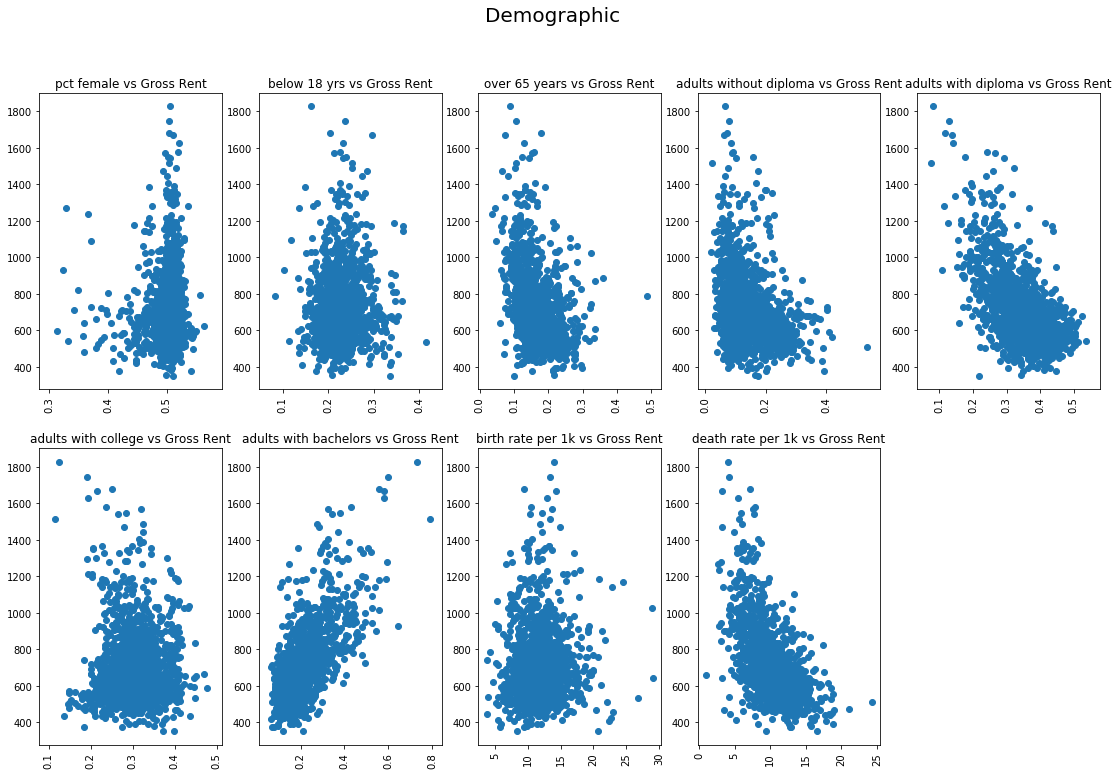

In [ ]:

plt.rcParams['figure.figsize'] = (19, 12)

plt.subplot(251)
plt.scatter(train['pct_female'], label['gross_rent'])
plt.title('pct female vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(252)
plt.scatter(train['pct_below_18_years_of_age'], label['gross_rent'])
plt.title('below 18 yrs vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(253)
plt.scatter(train['pct_aged_65_years_and_older'], label['gross_rent'])
plt.title('over 65 years vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(254)
plt.scatter(train['pct_adults_less_than_a_high_school_diploma'], label['gross_rent'])
plt.title('adults without diploma vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(255)
plt.scatter(train['pct_adults_with_high_school_diploma'], label['gross_rent'])
plt.title('adults with diploma vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(256)
plt.scatter(train['pct_adults_with_some_college'], label['gross_rent'])
plt.title('adults with college vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(257)
plt.scatter(train['pct_adults_bachelors_or_higher'], label['gross_rent'])
plt.title('adults with bachelors vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(258)
plt.scatter(train['birth_rate_per_1k'], label['gross_rent'])
plt.title('birth rate per 1k vs Gross Rent')
plt.xticks(rotation = 90)

plt.subplot(259)
plt.scatter(train['death_rate_per_1k'], label['gross_rent'])
plt.title('death rate per 1k vs Gross Rent')
plt.xticks(rotation = 90)

plt.suptitle('Demographic', fontsize = 20)
plt.show()

### We can clearly see that there are  one outlier each in over 65 years, adults without diploma 

In [ ]:
# let's remove the outliers from over 65 years
#pct_aged_65_years_and_older - Percent of population that is aged 65 years or older

train_data = train_data.drop(train_data[(train_data['pct_aged_65_years_and_older']> 0.4)].index)

In [ ]:
# let's remove the outliers from adults without diploma

train_data = train_data.drop(train_data[(train_data['pct_adults_less_than_a_high_school_diploma']> 0.5)].index)

In [ ]:
# let's check the shape of the dataset after outlier treatment

train_data.shape

(1548, 43)

In [ ]:
# Unique number of County

train['county_code'].nunique()

1562

In [ ]:
# unique number of states

train['state'].nunique()

50

In [ ]:
# checking the minimum value of gross rent

label['gross_rent'].min()

351

In [ ]:
# checking the maximum value of the gross rent

label['gross_rent'].max()

1827

In [ ]:
# checking the average value of the gross rent

label['gross_rent'].mean()

701.1421254801536

In [ ]:
# checking the median value of the gross rent

label['gross_rent'].median()

650.0

In [ ]:
# checking the standard deviation in gross rent

import statistics
statistics.stdev(label['gross_rent'])

192.88310953787266

In [ ]:
train_data.pct_adult_smoking.nunique()

284

In [ ]:
# checking the null values present in the data

train_data.isnull().sum()

population                                      0
renter_occupied_households                      0
pct_renter_occupied                             0
evictions                                     319
rent_burden                                     0
pct_white                                       0
pct_af_am                                       0
pct_hispanic                                    0
pct_am_ind                                      0
pct_asian                                       0
pct_nh_pi                                       0
pct_multiple                                    0
pct_other                                       0
poverty_rate                                    0
rucc                                            0
urban_influence                                 0
economic_typology                               0
pct_civilian_labor                              0
pct_unemployment                                0
pct_uninsured_adults                            2


In [ ]:
# from sklearn.base import BaseEstimator, TransformerMixin, clone
# class MissingData(BaseEstimator, TransformerMixin):
#     def __init__(self, impute_method='iterative'):
        
#         if impute_method not in {'iterative'}:
#             raise ValueError('Invalid impute_method "%s"' % impute_method)
        
#         if impute_method=='iterative':
#             self.imputer = IterativeImputer(sample_posterior=True, max_iter=100)
#         self.impute_method = impute_method
    
#     def fit(self, X, y=None):
#         X_copy = X.copy()
#         X_copy = X_copy.select_dtypes(exclude=['int64', 'object'])
#         self.missing_feats = X_copy.columns.tolist()
#         X_copy_values = X_copy.values
#         self.imputer.fit(X_copy_values)
#         return self
    
#     def transform(self, X, y=None):
#         X_copy = X.copy()
#         missing = X_copy[self.missing_feats]
#         X_copy.drop(columns=self.missing_feats, inplace=True)
#         missing = self.imputer.transform(missing)
#         missing_df = pd.DataFrame(data=missing, columns=self.missing_feats)
#         X_copy = X_copy.merge(missing_df, left_index=True, right_index=True)
#         return X_copy

In [ ]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# imputer = MissingData(impute_method='iterative')

# train_data = imputer.fit_transform(train_data)
# test = imputer.transform(test)

In [ ]:
# let's check the null values present in the test data set

test.isnull().sum().sum()

2445

In [ ]:

train_data.isnull().sum().sum()

2486

In [ ]:
df_obj=train_data.select_dtypes(exclude=['int64','float64'])
df_num=train_data.select_dtypes(include=['int64','float64'])

In [ ]:
#excluding object types from the data
list_float = train_data.select_dtypes(exclude=['object']).columns

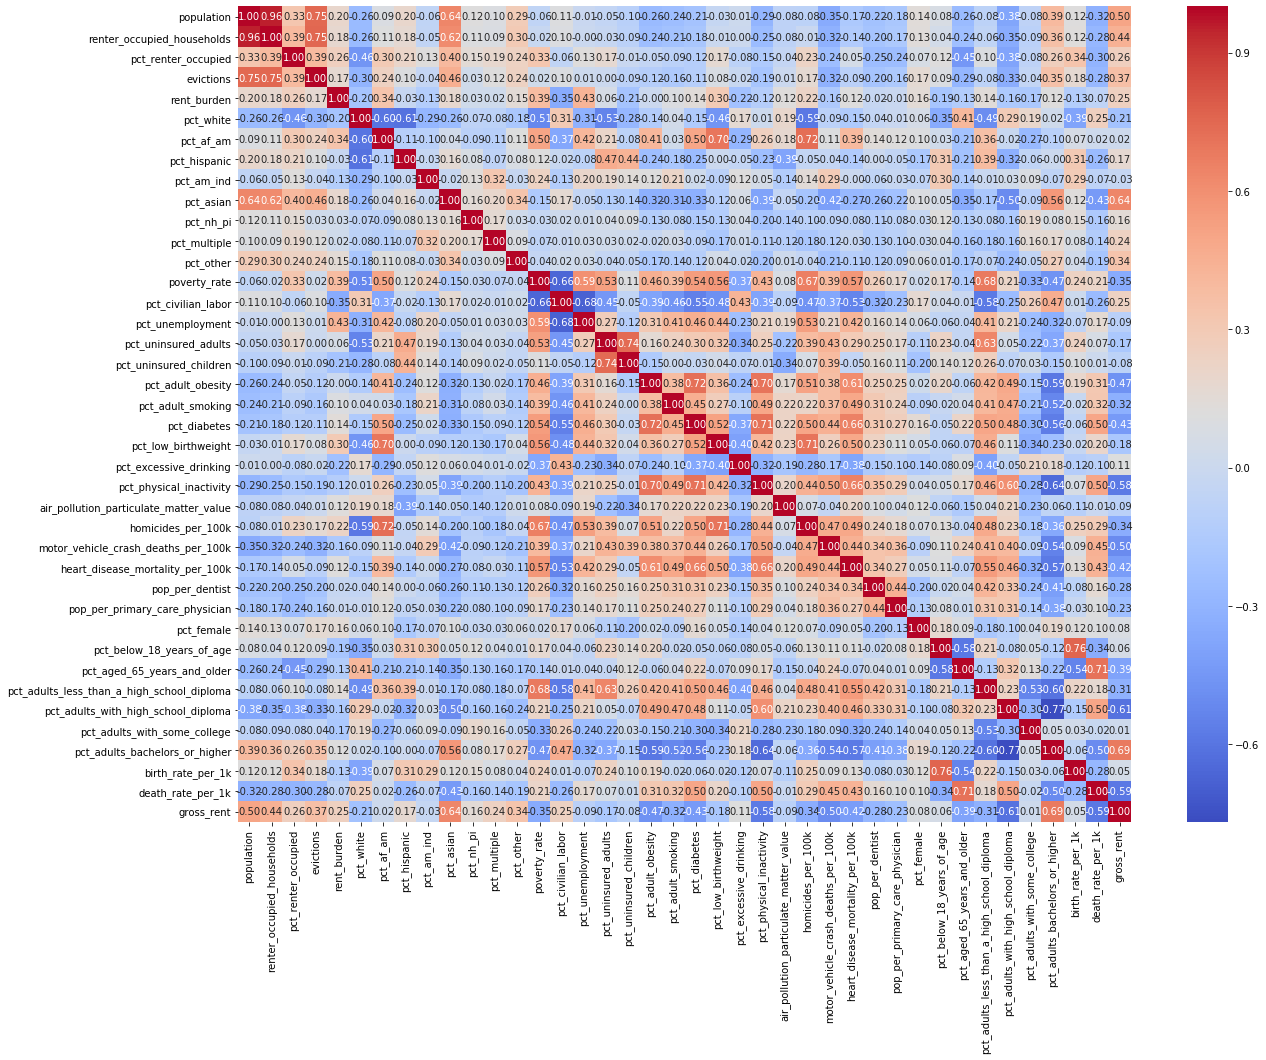

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,15))         # Sample figsize in inches
cm_df = sns.heatmap(train_data[list_float].corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)

In [ ]:
#dropping some high correlated features
train_data.drop(["population","pct_adults_with_high_school_diploma"],axis=1,inplace=True)

In [ ]:
#handling some negative values
train_data.evictions[train_data.evictions <0 ]= 0

C:\Users\ranit\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
##handling some negative values
train_data.homicides_per_100k[train_data.homicides_per_100k <0 ]= 0

C:\Users\ranit\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
train_labels = train_data['gross_rent']
train_values = train_data.drop(['gross_rent'], axis = 1)

In [ ]:
# from sklearn.model_selection import train_test_split

# x_train, x_valid, y_train, y_valid = train_test_split(train_values, train_labels, test_size = 0.2, random_state=10)

In [ ]:
#df_obj=train_data.select_dtypes(exclude=['int64','float64'])
#df_num=train_data.select_dtypes(include=['int64','float64'])

In [ ]:
train_data_1=train_data

## Encoding

In [ ]:
# doing  encoding for the categorical variables

train_data = pd.get_dummies(train_data)
test = pd.get_dummies(test)

In [ ]:
# let's check the columns after deleting the above columns

train_data.columns

Index(['renter_occupied_households', 'pct_renter_occupied', 'evictions',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
       'pct_civilian_labor', 'pct_unemployment', 'pct_uninsured_adults',
       'pct_uninsured_children', 'pct_adult_obesity', 'pct_adult_smoking',
       'pct_diabetes', 'pct_low_birthweight', 'pct_excessive_drinking',
       'pct_physical_inactivity', 'air_pollution_particulate_matter_value',
       'homicides_per_100k', 'motor_vehicle_crash_deaths_per_100k',
       'heart_disease_mortality_per_100k', 'pop_per_dentist',
       'pop_per_primary_care_physician', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_school_diploma',
       'pct_adults_with_some_college', 'pct_adults_bachelors_or_higher',
       'birth_rate_per_1k', 'death_rate_per_1k', 'gross_rent',
       'rucc_Metro - Counties in m

## Splitting the dependent and independent variables from train data

In [ ]:
# Splitting the variables accordingly

train_labels = train_data['gross_rent']
train_values = train_data.drop(['gross_rent'], axis = 1)

print('shape of train_values :', train_values.shape)
print('shape of train_labels :', train_labels.shape)

shape of train_values : (1548, 64)
shape of train_labels : (1548,)


In [ ]:
# splitting the train_data into train and valid

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_values, train_labels, test_size = 0.2, random_state=0)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)


(1238, 64)
(310, 64)
(1238,)
(310,)


In [ ]:
test.drop(["population","pct_adults_with_high_school_diploma"],axis=1,inplace=True)

In [ ]:
#Validation function
n_folds = 5
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
# LASSO MODEL
# WITH PIPELINE  and using robust scalerTO AVOID SENSITIVITY TOWARDS OUTLIERS

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso


#lasso = make_pipeline(SimpleImputer(copy=False),RobustScaler(), Lasso(alpha = 0.0005, random_state = 3))
#lasso.fit(x_train, y_train)

In [ ]:
# score = rmsle_cv(lasso)
# print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


In [ ]:
# pred = lasso.predict(test)

In [ ]:
# pred_valid = lasso.predict(x_valid)
# from sklearn.metrics import r2_score

# r2 = r2_score(y_valid, pred_valid)
# r2

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression

linear = make_pipeline(SimpleImputer(copy=False),RobustScaler(), LinearRegression())
linear.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=False, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
#pred_test = linear.predict(test)
pred_train=linear.predict(x_train)

In [ ]:
# test set accuracy
pred_valid = linear.predict(x_valid)
from sklearn.metrics import r2_score

r2 = r2_score(y_valid, pred_valid)
r2

0.762830459418911

In [ ]:
# train set accuracy
pred_valid = linear.predict(x_train)

r2 = r2_score(y_train, pred_valid)
r2

0.7823520170065087

In [ ]:
#gradient boost
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [ ]:
GBoost= make_pipeline(RobustScaler(),SimpleImputer(copy=False), GradientBoostingRegressor(alpha = 0.0005, random_state = 3))
GBoost.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=False, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.0005,
                                           criterion='friedman_mse...
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_sample

In [ ]:
pred_train=GBoost.predict(x_train)

In [ ]:
# test set accuracy
pred_valid = GBoost.predict(x_valid)
from sklearn.metrics import r2_score

r2 = r2_score(y_valid, pred_valid)
r2

0.8176774958839791

In [ ]:
#cross validation
r2score = cross_val_score(GBoost,train_values,train_labels,cv=5,n_jobs=-1,scoring='r2')

In [ ]:
#lets take the mean of cv r2 og GBoost
r2score.mean()

0.7978010376198524

In [ ]:
# from sklearn.linear_model import Ridge
# ridge_reg = Ridge(random_state=0)
# ridge_reg.fit(x_train,y_train)
# y_pred_ridge = linear_model.predict(x_valid)

# rmse = np.sqrt(mean_squared_error(y_valid,y_pred_ridge))
# r2 = r2_score(y_valid,y_pred_ridge)

# print('Root mean squared error on Testing Set', rmse)
# print('R2 score on Testing Set: ', r2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_validate
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score,accuracy_score, roc_curve

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score

In [ ]:
# from sklearn.base import BaseEstimator, TransformerMixin, clone
# class MissingData(BaseEstimator, TransformerMixin):
#     def __init__(self, impute_method='iterative'):
        
#         if impute_method not in {'iterative'}:
#             raise ValueError('Invalid impute_method "%s"' % impute_method)
        
#         if impute_method=='iterative':
#             self.imputer = IterativeImputer(sample_posterior=True, max_iter=100)
#         self.impute_method = impute_method
    
#     def fit(self, X, y=None):
#         X_copy = X.copy()
#         X_copy = X_copy.select_dtypes(exclude=['int64', 'object'])
#         self.missing_feats = X_copy.columns.tolist()
#         X_copy_values = X_copy.values
#         self.imputer.fit(X_copy_values)
#         return self
    
#     def transform(self, X, y=None):
#         X_copy = X.copy()
#         missing = X_copy[self.missing_feats]
#         X_copy.drop(columns=self.missing_feats, inplace=True)
#         missing = self.imputer.transform(missing)
#         missing_df = pd.DataFrame(data=missing, columns=self.missing_feats)
#         X_copy = X_copy.merge(missing_df, left_index=True, right_index=True)
#         return X_copy

In [ ]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# imputer = MissingData(impute_method='iterative')

# train_data = imputer.fit_transform(train_data)
# test = imputer.transform(test)

In [ ]:
train_data_2=train_data_1

In [ ]:
train_data_1.isnull().sum()

renter_occupied_households                      0
pct_renter_occupied                             0
evictions                                     319
rent_burden                                     0
pct_white                                       0
pct_af_am                                       0
pct_hispanic                                    0
pct_am_ind                                      0
pct_asian                                       0
pct_nh_pi                                       0
pct_multiple                                    0
pct_other                                       0
poverty_rate                                    0
rucc                                            0
urban_influence                                 0
economic_typology                               0
pct_civilian_labor                              0
pct_unemployment                                0
pct_uninsured_adults                            2
pct_uninsured_children                          2


In [ ]:
cols = ['evictions','pct_adult_smoking','pct_diabetes','pct_uninsured_adults','pct_uninsured_children',
        'pct_low_birthweight','pct_excessive_drinking','pct_adult_obesity',
        'pct_physical_inactivity','air_pollution_particulate_matter_value','homicides_per_100k',
        'motor_vehicle_crash_deaths_per_100k','pop_per_dentist','pop_per_primary_care_physician',
        'pct_female','pct_below_18_years_of_age','pct_aged_65_years_and_older']

In [ ]:
train_data_1[cols] = train_data_1[cols].fillna(train_data_1.mean())

In [ ]:
train_data_1 = pd.get_dummies(train_data_1)
test = pd.get_dummies(test)

In [ ]:
train_labels = train_data_1['gross_rent']
train_values = train_data_1.drop(['gross_rent'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_values, train_labels, test_size = 0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=150,criterion='mae',max_depth=16, min_samples_split=2,
                           min_samples_leaf=2,max_features='auto',bootstrap=True,n_jobs=-1,random_state=5, verbose=1)

In [ ]:
rfFit = rf.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   37.1s finished


In [ ]:
y_predict = rfFit.predict(x_valid)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished


In [ ]:
# r2 score
rfFit.score(x_valid,y_valid)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished


0.7797750440009802

In [ ]:
r2_score(y_valid,y_predict,multioutput='variance_weighted')

0.7797750440009802

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print(np.sqrt(mean_squared_error(y_valid, y_predict)))
print(r2_score(y_valid, y_predict))

93.50847133666784
0.7797750440009802


In [ ]:
# cv random forest

In [ ]:
r2score = cross_val_score(rfFit,train_values,train_labels,cv=5,n_jobs=-1,scoring='r2')

In [ ]:
r2score

array([0.75003166, 0.76558812, 0.74132223, 0.78435896, 0.75959665])

In [ ]:
r2score.mean()

0.7601795252806957

In [ ]:
r2score.std()

0.014647964645824567

In [ ]:
# Random search Rf
#we will tune hyper parameters with random and grid search
from sklearn.ensemble import RandomForestRegressor
base = RandomForestRegressor(n_estimators=10,criterion='mae',bootstrap=True, max_features='auto',
                             n_jobs=-1,random_state=5)

In [ ]:
params = {'n_estimators' : [150,200],
          'max_depth':[8,16,24],
          'min_samples_leaf': [2, 4, 6]
        }
print(params)

{'n_estimators': [150, 200], 'max_depth': [8, 16, 24], 'min_samples_leaf': [2, 4, 6]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(base,params,n_iter=100,scoring='r2',n_jobs=-1,cv=4,verbose=1,random_state=5)

In [ ]:
random.fit(train_values,train_labels)

C:\Users\ranit\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 23.6min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mae',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=-1,
                                                   oob_score=False,
                                                   random_state=5, verb

In [ ]:
random.best_params_

{'n_estimators': 200, 'min_samples_leaf': 2, 'max_depth': 16}

In [ ]:
# Grid search

In [ ]:
base = RandomForestRegressor(n_estimators=10,criterion='mae',bootstrap=True, max_features='auto',
                             min_samples_leaf=2,n_jobs=-1,random_state=5)

In [ ]:
params = {'n_estimators' : [150,200],
          'max_depth':[8,16,24],
          'min_samples_split': [2, 4, 6]
         }

print(params)

{'n_estimators': [150, 200], 'max_depth': [8, 16, 24], 'min_samples_split': [2, 4, 6]}


In [ ]:
grid = GridSearchCV(base,params,scoring='r2',n_jobs=-1,cv=3,verbose=1,return_train_score=True)

In [ ]:
grid.fit(train_values,train_labels)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 12.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mae',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=2,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=-1,
                                             oob_score=False, random_state=5,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [8, 16, 24],
                

In [ ]:
grid.best_params_

{'max_depth': 24, 'min_samples_split': 2, 'n_estimators': 200}

In [ ]:
#  after tunning select best model and train with all trainset data

rf = RandomForestRegressor(n_estimators=200,criterion='mae',max_depth=24, min_samples_split=2,
                           min_samples_leaf=2,max_features='auto',bootstrap=True,n_jobs=-1,random_state=5, verbose=1)

In [ ]:
rfFit = rf.fit(train_values,train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   32.0s finished


In [ ]:
y_predict = rfFit.predict(x_valid)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


In [ ]:
#rfFit.score(X,y)

In [ ]:
# r2 score
rfFit.score(x_valid,y_valid)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


0.951130153929224

In [ ]:
#predictions
y_predict[0:5]

array([ 641.735 ,  589.4075,  750.6375,  596.9525, 1079.4375])

Text(0, 0.5, 'Predictions')

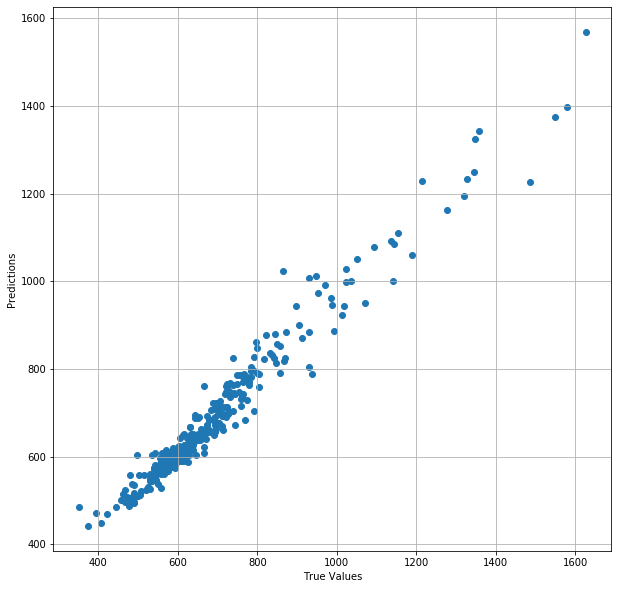

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_valid,y_predict)
plt.grid()
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [ ]:
#placing our predictions in a dataframe
testresult = pd.DataFrame(y_predict.astype(int), columns=['gross_rent'])

In [ ]:
testresult.head()

,gross_rent
0,641
1,589
2,750
3,596
4,1079


In [ ]:
#dataframe to csv file
testresult.to_csv("pred_rent.csv",index_label=['row_id'])

In [ ]:
train_data_2.head()

,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,rucc,urban_influence,economic_typology,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,...,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
0,408.0,24.583,357.21725,18.380,0.945945,0.010761,0.026038,0.005685,0.005635,0.0,0.005935,0.000000,4.172,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and does not co...,Manufacturing-dependent,0.550,0.023,0.107,0.062,...,0.166,0.100,0.083361,0.262,0.342,11.022908,5.76056,21.730066,217,3424.905226,2504.699374,0.471,0.218,0.190,0.083250,0.389168,0.199599,10.008982,9.752342,577
1,1166.0,28.346,3.00000,26.694,0.808959,0.002284,0.173426,0.001803,0.001493,0.0,0.012033,0.000000,7.714,"Nonmetro - Completely rural or less than 2,500...",Micropolitan not adjacent to a metro area,Recreation,0.545,0.040,0.324,0.201,...,0.102,0.066,0.070000,0.200,0.148,9.904099,5.76056,18.260000,181,2009.000000,1690.000000,0.472,0.290,0.077,0.099099,0.302302,0.396396,14.482893,3.013219,844
2,2927.0,21.641,9.00000,31.028,0.956621,0.005141,0.013088,0.004728,0.004708,0.0,0.014809,0.000905,9.789,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Recreation,0.508,0.063,0.129,0.032,...,0.215,0.087,0.070000,0.187,0.258,11.011502,5.76056,19.940000,234,4650.000000,1350.000000,0.496,0.208,0.192,0.137725,0.255489,0.219561,9.620346,10.873572,700
3,1039.0,23.110,0.00000,27.734,0.894835,0.000298,0.076576,0.000995,0.004297,0.0,0.022999,0.000000,13.735,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.545,0.038,0.207,0.084,...,0.182,0.104,0.081000,0.169,0.274,12.845770,5.76056,30.310000,231,4420.000000,1749.000000,0.503,0.193,0.215,0.077154,0.398798,0.215431,9.383225,10.870809,592
4,365.0,21.985,2.00000,19.673,0.923886,0.000496,0.042889,0.000000,0.013622,0.0,0.016905,0.002202,8.217,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and does not co...,Farm-dependent,0.474,0.034,0.177,0.075,...,0.118,0.113,0.083361,0.178,0.340,11.565750,5.76056,21.730066,270,3424.905226,1249.000000,0.516,0.222,0.230,0.092537,0.346269,0.199005,9.543286,14.723926,444


In [ ]:
#average out models

In [ ]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

# model scoring and validation function
def cv_rmse(model,X=x_train):
    rmse = np.sqrt(-cross_val_score(model, x_train, y_train,scoring="neg_mean_squared_error",cv=kfolds))
    return (rmse)

# rmsle scoring function
def rmsle(y_train,y_valid):
    return np.sqrt(mean_squared_error(y_train,y_valid))

In [ ]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
# This is a range of values that the model considers each time in runs a CV
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]


# Kernel Ridge Regression : made robust to outliers
ridge = make_pipeline(RobustScaler(), SimpleImputer(copy=False),RidgeCV(alphas=alphas_alt, cv=kfolds))

# LASSO Regression : made robust to outliers
lasso = make_pipeline(RobustScaler(),SimpleImputer(copy=False), LassoCV(max_iter=1e7, 
                    alphas=alphas2,random_state=42, cv=kfolds))

# Elastic Net Regression : made robust to outliers
elasticnet = make_pipeline(RobustScaler(),SimpleImputer(copy=False), ElasticNetCV(max_iter=1e7, 
                         alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))

In [ ]:
 #store models, scores and prediction values 
models = {'Ridge': ridge,
          'Lasso': lasso, 
          'ElasticNet': elasticnet}
predictions = {}
scores = {}

for name, model in models.items():
    
    model.fit(x_train, y_train)
    predictions[name] = np.expm1(model.predict(x_valid))
    
    score = cv_rmse(model,X=x_train)
    scores[name] = (score.mean(), score.std())

C:\Users\ranit\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in expm1
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ranit\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in expm1
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ranit\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in expm1
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
# get the performance of each model on training data(validation set)
#print('---- Score with CV_RMSLE-----')
score = cv_rmse(ridge)
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Ridge score: 92.3241 (11.0095)

Lasso score: 92.5576 (10.7795)

ElasticNet score: 92.5513 (10.7827)



In [ ]:
#Fit the training data X, y
#print('----START Fit----',datetime.now())
print('Elasticnet')
elastic_model = elasticnet.fit(x_train, y_train)
print('Lasso')
lasso_model = lasso.fit(x_train, y_train)
print('Ridge')
ridge_model = ridge.fit(x_train, y_train)

Elasticnet
Lasso
Ridge


In [ ]:
def blend_models(X):
    return ((elastic_model.predict(x_valid)) + (lasso_model.predict(x_valid)) + (ridge_model.predict(x_valid)))/3
blended_score = rmsle(y_train, blend_models(x_train))
print('RMSLE score on train data:')
print(rmsle(y_train, blend_models(x_train)))

RMSLE score on train data:
87.98997380447658


In [ ]:
# lets apply PCA
train_data_copy=train_data_2

In [ ]:
train_data_2.head()

,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,rucc,urban_influence,economic_typology,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,...,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
0,408.0,24.583,357.21725,18.380,0.945945,0.010761,0.026038,0.005685,0.005635,0.0,0.005935,0.000000,4.172,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and does not co...,Manufacturing-dependent,0.550,0.023,0.107,0.062,...,0.166,0.100,0.083361,0.262,0.342,11.022908,5.76056,21.730066,217,3424.905226,2504.699374,0.471,0.218,0.190,0.083250,0.389168,0.199599,10.008982,9.752342,577
1,1166.0,28.346,3.00000,26.694,0.808959,0.002284,0.173426,0.001803,0.001493,0.0,0.012033,0.000000,7.714,"Nonmetro - Completely rural or less than 2,500...",Micropolitan not adjacent to a metro area,Recreation,0.545,0.040,0.324,0.201,...,0.102,0.066,0.070000,0.200,0.148,9.904099,5.76056,18.260000,181,2009.000000,1690.000000,0.472,0.290,0.077,0.099099,0.302302,0.396396,14.482893,3.013219,844
2,2927.0,21.641,9.00000,31.028,0.956621,0.005141,0.013088,0.004728,0.004708,0.0,0.014809,0.000905,9.789,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Recreation,0.508,0.063,0.129,0.032,...,0.215,0.087,0.070000,0.187,0.258,11.011502,5.76056,19.940000,234,4650.000000,1350.000000,0.496,0.208,0.192,0.137725,0.255489,0.219561,9.620346,10.873572,700
3,1039.0,23.110,0.00000,27.734,0.894835,0.000298,0.076576,0.000995,0.004297,0.0,0.022999,0.000000,13.735,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.545,0.038,0.207,0.084,...,0.182,0.104,0.081000,0.169,0.274,12.845770,5.76056,30.310000,231,4420.000000,1749.000000,0.503,0.193,0.215,0.077154,0.398798,0.215431,9.383225,10.870809,592
4,365.0,21.985,2.00000,19.673,0.923886,0.000496,0.042889,0.000000,0.013622,0.0,0.016905,0.002202,8.217,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and does not co...,Farm-dependent,0.474,0.034,0.177,0.075,...,0.118,0.113,0.083361,0.178,0.340,11.565750,5.76056,21.730066,270,3424.905226,1249.000000,0.516,0.222,0.230,0.092537,0.346269,0.199005,9.543286,14.723926,444


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_data_2["rucc"].head()

0    Nonmetro - Completely rural or less than 2,500...
1    Nonmetro - Completely rural or less than 2,500...
2    Nonmetro - Urban population of 2,500 to 19,999...
3    Nonmetro - Urban population of 2,500 to 19,999...
4    Nonmetro - Completely rural or less than 2,500...
Name: rucc, dtype: object

In [ ]:
#label encoding few columns
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
  
train_data_2['rucc']= label_encoder.fit_transform(train_data_2['rucc']) 
train_data_2['urban_influence']= label_encoder.fit_transform(train_data_2['urban_influence']) 
train_data_2['economic_typology']= label_encoder.fit_transform(train_data_2['economic_typology']) 

In [ ]:
train_labels = train_data_2['gross_rent']
train_values = train_data_2.drop(['gross_rent'], axis = 1)

In [ ]:
features=train_values.columns

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# scaled_features=scaler.fit_transform(train_values) 

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaled_features=scaler.fit_transform(train_values) 

In [ ]:
#scaling has to be done before pca
scaled_df=pd.DataFrame(scaled_features,columns=features)
scaled_df.head()

,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,rucc,urban_influence,economic_typology,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,-0.339988,-0.273689,0.813506,-1.921257,0.351402,-0.101016,-0.151939,0.636545,0.044852,0.0,-0.743968,-0.252512,-0.998435,0.0,0.250,-0.666667,0.883333,-1.266667,-1.172043,-0.346939,0.081633,-0.689581,-0.166667,0.160068,2.566972,0.884058,-0.362655,0.0,0.000000,-0.677316,0.266139,0.324899,-2.0625,-0.241611,0.487805,-0.493567,1.258395,0.175598,-0.490450,-0.182542
1,-0.230137,0.129321,-0.195036,-0.384473,-0.137529,-0.188057,1.835367,-0.165014,-0.395629,0.0,-0.208907,-0.252512,-0.494666,0.0,-0.375,0.333333,0.827778,-0.700000,1.161290,2.489796,-1.081633,-1.659278,-1.300000,-0.476190,0.935394,-1.927536,-0.824455,0.0,-0.312407,-1.137380,-0.437679,-0.296890,-2.0000,1.691275,-1.717073,-0.323477,-0.014670,2.180773,1.055565,-2.057674
2,0.025072,-0.588771,-0.177953,0.416636,0.389506,-0.158728,-0.326552,0.438930,-0.053737,0.0,0.034589,0.503733,-0.199545,0.5,0.375,0.333333,0.416667,0.066667,-0.935484,-0.959184,-0.204082,0.052843,-0.600000,-0.476190,0.593288,-0.333333,-0.367363,0.0,-0.161158,-0.460064,0.875109,-0.556382,-0.5000,-0.510067,0.526829,0.091036,-0.700749,0.378992,-0.624748,0.129435
3,-0.248542,-0.431444,-0.203578,-0.192237,0.168981,-0.208451,0.529480,-0.332016,-0.097424,0.0,0.753179,-0.252512,0.361684,0.5,0.375,0.000000,0.827778,-0.766667,-0.096774,0.102041,-1.040816,-0.447157,-0.033333,0.047619,0.119604,-0.101449,0.389749,0.0,0.772445,-0.498403,0.760780,-0.251860,-0.0625,-0.912752,0.975610,-0.558980,1.399530,0.336911,-0.706689,0.128666
4,-0.346219,-0.551929,-0.197883,-1.682255,0.272669,-0.206421,0.075261,-0.537424,0.894063,0.0,0.218569,1.587095,-0.423126,0.0,0.250,-1.333333,0.038889,-0.900000,-0.419355,-0.081633,0.367347,-1.416854,0.266667,0.160068,0.356446,0.855072,-0.138592,0.0,0.000000,0.000000,0.266139,-0.633467,0.7500,-0.134228,1.268293,-0.393896,0.629685,0.169548,-0.651378,1.200779


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#choosing 10 components
pca=PCA(n_components=10)
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.components_

array([[-2.35590998e-02,  6.89463978e-03, -5.75004360e-03,
        -7.31473072e-03, -1.35859132e-02, -1.02266773e-02,
        -4.06134738e-03,  9.97509085e-01, -4.44121673e-03,
         3.55437024e-02,  2.66335237e-02, -2.71743898e-03,
         1.30053164e-02,  3.14413919e-03,  2.30637341e-03,
        -2.24650624e-03, -6.48233148e-03,  9.86394806e-03,
         8.85765301e-03,  7.85181442e-03,  6.96455587e-03,
         1.25395472e-02,  1.06670289e-03, -5.57704990e-03,
         8.77211434e-03,  2.65031073e-03, -4.75725932e-03,
         1.19208651e-02,  1.37243866e-02, -9.86935601e-05,
        -4.04767891e-03, -2.11226076e-03, -6.60120633e-03,
         1.79105753e-02, -7.98817756e-03, -2.94481318e-04,
         4.70299035e-03, -4.42902008e-03,  1.82478901e-02,
        -3.64871016e-03],
       [ 8.88381788e-01,  5.73545495e-02,  3.29917573e-01,
         2.47245452e-02, -3.34203701e-02,  2.55887555e-02,
         5.57003789e-02,  2.04238587e-02,  2.34144009e-01,
         1.04129595e-01,  2.76

In [ ]:
#variance explained by the pca's
pca.explained_variance_

array([229.13087387,  43.25154838,  14.61493496,  10.07450747,
         4.76214875,   4.10153576,   3.72545052,   3.10472227,
         2.2628017 ,   1.9292923 ])

In [ ]:
x=np.arange(1,11)
y=pca.explained_variance_ratio_

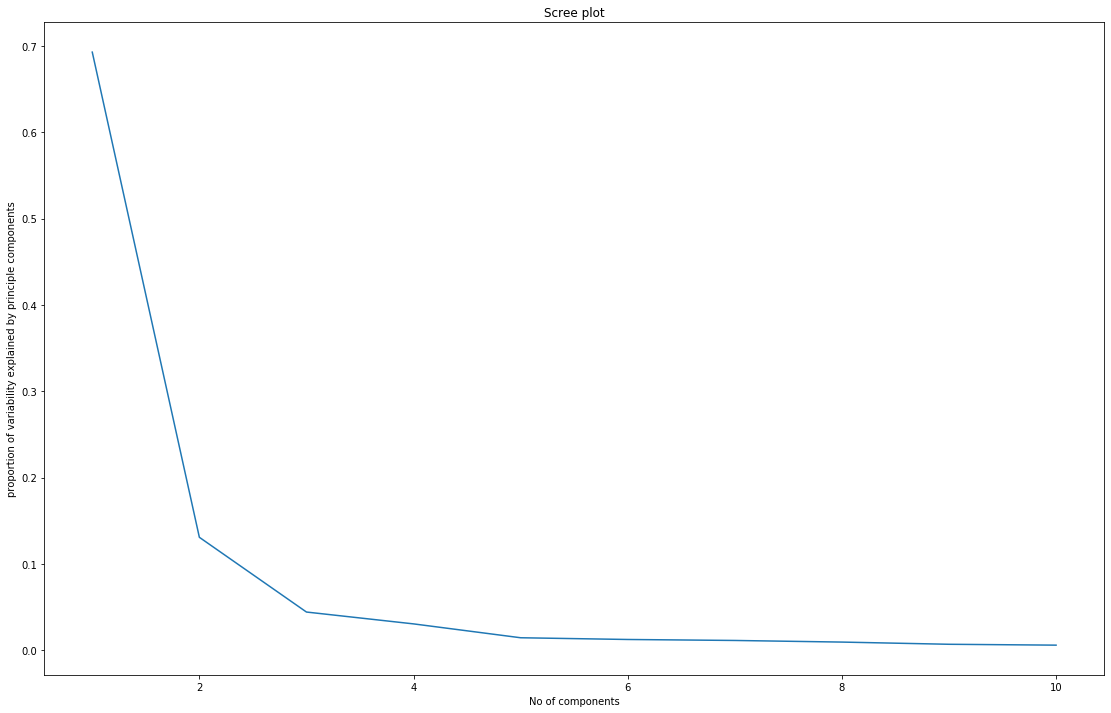

In [ ]:
#plot graph tp choose the break point
plt.plot(x,y)
plt.xlabel("No of components")
plt.ylabel("proportion of variability explained by principle components")
plt.title("Scree plot")
plt.show()

In [ ]:
pca=PCA(n_components=3)
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
score=pca.transform(scaled_df)

In [ ]:
new_df=pd.DataFrame(data=score,columns=["PC1","PC2","PC3"])

In [ ]:
new_df.head()

,PC1,PC2,PC3
0,-2.490751,-2.322080,-0.786676
1,-3.193756,-1.853458,-0.012755
2,-2.708936,-2.153959,-0.869771
3,-3.445332,-2.491822,-0.704387
4,-3.673653,-2.330020,-0.796838


In [ ]:
#including our target to the data
new_df["target"]=train_labels

In [ ]:
#replacing missing values with mean
new_df=new_df.fillna(new_df.mean())

In [ ]:
new_df.head()

,PC1,PC2,PC3,target
0,-2.490751,-2.322080,-0.786676,577.0
1,-3.193756,-1.853458,-0.012755,844.0
2,-2.708936,-2.153959,-0.869771,700.0
3,-3.445332,-2.491822,-0.704387,592.0
4,-3.673653,-2.330020,-0.796838,444.0


In [ ]:
#dependent and independent variable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
ind=new_df.loc[:,"PC1":"PC3"]
dep=new_df.loc[:,"target"]

In [ ]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(ind,dep,test_size=0.2,random_state=10)

In [ ]:
#apply linear regression
linR=LinearRegression().fit(X_train,y_train)
pred=linR.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# mean squared error
print(mean_squared_error(y_test,pred))
# rmse score
print(np.sqrt(mean_squared_error(y_test,pred)))

37517.36517390616
193.693998807155


In [ ]:
DAT102x_Predicting_County-Level_Rents
About the Data

Your goal is to predict the median gross rent at the county level from other socioeconomic and demographic indicators.

Features
There are 43 variables in this dataset. Each row in the dataset represents a United States county in a single year. We provide a unique identifier for an individual county, but note that the counties in the test set are distinct from counties in the train set. In other words, no county that appears in the train set will appear in the test set. Thus, county-specific features (i.e. county dummy variables) will not be an option. However, the counties in the test set still share similar patterns as those in the train set and so other feature engineering will work the same as usual.

#ID
county_code - Unique identifier for each county
state - Unique identifier for each state
population - Total population
#Housing
renter_occupied_households - Count of renter-occupied households
pct_renter_occupied - Percent of occupied housing units that are renter-occupied
evictions - Number of eviction judgments in which renters were ordered to leave in a given area and year
rent_burden - Median gross rent as a percentage of household income
#Ethnicity
pct_white - Percent of population that is White alone and not Hispanic or Latino
pct_af_am - Percent of population that is Black or African American alone and not Hispanic or Latino
pct_hispanic - Percent of population that is of Hispanic or Latino origin
pct_am_ind - Percent of population that is American Indian and Alaska Native alone and not Hispanic or Latino
pct_asian - Percent of population that is Asian alone and not Hispanic or Latino
pct_nh_pi - Percent of population that is Native Hawaiian and Other Pacific Islander alone and not Hispanic or Latino
pct_multiple - Percent of population that is two or more races and not Hispanic or Latino
pct_other - Percent of population that is other race alone and not Hispanic or Latino
#Economic
poverty_rate - Percent of the population with income in the past 12 months below the poverty level
rucc - Rural-Urban Continuum Codes "form a classification scheme that distinguishes metropolitan counties by the population size of their metro area, and nonmetropolitan counties by degree of urbanization and adjacency to a metro area. The official Office of Management and Budget (OMB) metro and nonmetro categories have been subdivided into three metro and six nonmetro categories. Each county in the U.S. is assigned one of the 9 codes." (USDA Economic Research Service)
urban_influence - Urban Influence Codes "form a classification scheme that distinguishes metropolitan counties by population size of their metro area, and nonmetropolitan counties by size of the largest city or town and proximity to metro and micropolitan areas." (USDA Economic Research Service)
economic_typology - County Typology Codes "classify all U.S. counties according to six mutually exclusive categories of economic dependence and six overlapping categories of policy-relevant themes. The economic dependence types include farming, mining, manufacturing, Federal/State government, recreation, and nonspecialized counties. The policy-relevant types include low education, low employment, persistent poverty, persistent child poverty, population loss, and retirement destination." (USDA Economic Research Service)
pct_civilian_labor - Civilian labor force, annual average, as percent of population.
pct_unemployment - Unemployment, annual average, as percent of population
#Health
pct_uninsured_adults - Percent of adults without health insurance
pct_uninsured_children - Percent of children without health insurance
pct_adult_obesity - Percent of adults who meet clinical definition of obese
pct_adult_smoking - Percent of adults who smoke
pct_diabetes - Percent of population with diabetes
pct_low_birthweight - Percent of babies born with low birth weight
pct_excessive_drinking - Percent of adult population that engages in excessive consumption of alcohol
pct_physical_inactivity - Percent of adult population that is physically inactive
air_pollution_particulate_matter_value - Fine particulate matter in µg/m³
homicides_per_100k - Deaths by homicide per 100,000 population
motor_vehicle_crash_deaths_per_100k - Deaths by motor vehicle crash per 100,000 population
heart_disease_mortality_per_100k - Deaths from heart disease per 100,000 population
pop_per_dentist - Population per dentist
pop_per_primary_care_physician - Population per Primary Care Physician
#Demographic
pct_female - Percent of population that is female
pct_below_18_years_of_age - Percent of population that is below 18 years of age
pct_aged_65_years_and_older - Percent of population that is aged 65 years or older
pct_adults_less_than_a_high_school_diploma - Percent of adult population that does not have a high school diploma
pct_adults_with_high_school_diploma - Percent of adult population which has a high school diploma as highest level of education achieved
pct_adults_with_some_college - Percent of adult population which has some college as highest level of education achieved
pct_adults_bachelors_or_higher - Percent of adult population which has a bachelor's degree or higher as highest level of education achieved
birth_rate_per_1k - Births per 1,000 of population
death_rate_per_1k - Deaths per 1,000 of population